# Flash ID validation 
Jupyter notebook to look at a PMT based neutrino ID for the LEE searches

### Imports

In [1]:
%load_ext autoreload
%matplotlib inline
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from helpers import plot_class
from helpers import helpfunction as helper

<IPython.core.display.Javascript object>

In [3]:
%autoreload

<IPython.core.display.Javascript object>

### Definitions

### Constants

In [4]:
outdir = "./output/neutrinoID/run_compare/"
indir = "./input/Jan2020/pickled/"
runs = [1, 2, 3]

<IPython.core.display.Javascript object>

In [5]:
# fidvol centre = x:10, y:15, z:30

<IPython.core.display.Javascript object>

In [6]:
run1_c1 = [4952, 6998]
run2_d2 = [8406, 11048]
run3_g1 = [14117, 17566]
shut1 = [6999, 8316]
shut2 = [11952, 13696]

blocks = [run1_c1, run2_d2, run3_g1, shut1, shut2]
c_blocks = ["green", "green", "green", "red", "red"]

run_min = 4900
run_max = 17600

<IPython.core.display.Javascript object>

### Load Data

In [7]:
%%time
run_dict = {}
for run in runs:
    in_file = open(indir + "data_run{}.pckl".format(run), "rb")
    run_dict[run] = pickle.load(in_file)
    in_file.close()
    in_file = open(indir + "mc_run{}.pckl".format(run), "rb")
    run_dict[run].update(pickle.load(in_file))
    in_file.close()

CPU times: user 1.02 s, sys: 1.51 s, total: 2.53 s
Wall time: 2.65 s


<IPython.core.display.Javascript object>

### Quick Checks

851259


/home/wouter/Binaries/miniconda3/envs/uproot/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in true_divide


851259
851259
459890
459890
459890


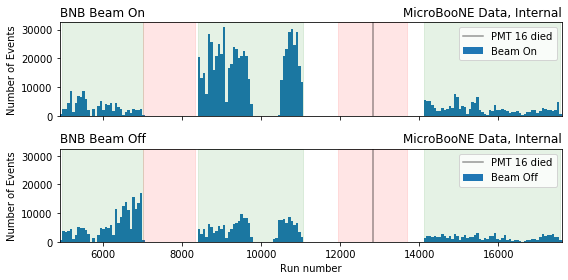

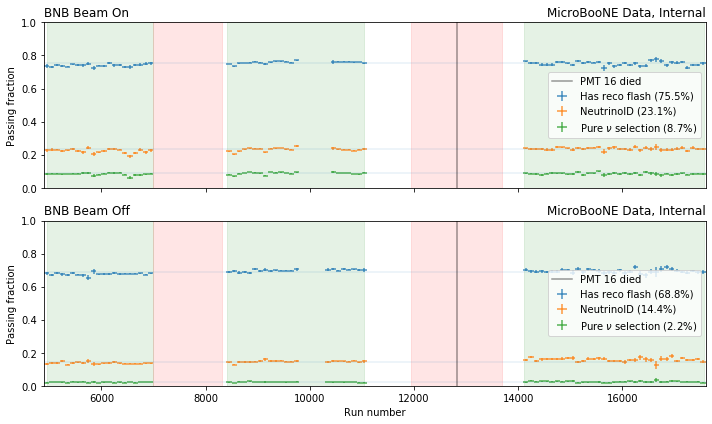

<IPython.core.display.Javascript object>

In [8]:
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(8, 4))
for ax_i, s in zip(ax, ["on", "off"]):
    runs_n = np.concatenate([run_dict[r][s]["events"]["run"] for r in runs])
    ax_i.hist(
        runs_n,
        range=(run_min, run_max),
        bins=200,
        label="Beam {}".format(s.capitalize()),
    )
    ax_i.set_xlim(run_min, run_max)
    ax_i.axvline(x=12831, label="PMT 16 died", c="k", alpha=0.4)
    ax_i.legend()
    ax_i.set_ylabel("Number of Events")
    for b, c in zip(blocks, c_blocks):
        ax_i.axvspan(b[0], b[1], alpha=0.1, color=c)
    ax_i.set_title("BNB Beam {}".format(s.capitalize()), loc="left")
    ax_i.set_title("MicroBooNE Data, Internal", loc="right")

ax[1].set_xlabel("Run number")
fig.tight_layout()
fig.savefig(outdir + "run_numbers.pdf", bbox_inches="tight")


queries = ["hasBeamFlash", "foundATargetSlice", "pure_selection"]
q_labs = ["Has reco flash", "NeutrinoID", r"Pure $\nu$ selection"]
N = 127

fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(10, 6))
for ax_i, s in zip(ax, ["on", "off"]):
    runs_n = np.concatenate([run_dict[r][s]["events"]["run"] for r in runs])
    for query, lab in zip(queries, q_labs):
        mask = np.concatenate([run_dict[r][s]["events"][query] > 0 for r in runs])
        print(len(mask))
        sel_runs = np.concatenate([run_dict[r][s]["events"]["run"] for r in runs])[mask]

        fraq_all = len(sel_runs) / len(runs_n)
        data = [runs_n, sel_runs]
        edges, edges_mid, bins, _ = plot_class.histHelper(N, run_min, run_max, data)
        widths = (edges[1:] - edges[:-1]) / 2
        fraq = bins[1] / bins[0]
        err = np.sqrt(fraq * (1 - fraq) / bins[0])
        ax_i.axhline(y=fraq_all, alpha=0.1)
        ax_i.errorbar(
            edges_mid,
            fraq,
            xerr=widths,
            yerr=err,
            label=r"{} ({:0.1%})".format(lab, fraq_all),
            fmt="none",
            alpha=0.8,
        )
    ax_i.set_ylabel("Passing fraction")
    ax_i.set_xlim(run_min, run_max)
    ax_i.set_ylim(0, 1)
    ax_i.axvline(x=12831, label="PMT 16 died", c="k", alpha=0.4)
    ax_i.legend()
    for b, c in zip(blocks, c_blocks):
        ax_i.axvspan(b[0], b[1], alpha=0.1, color=c)

    ax_i.legend(loc="center right")
    ax_i.set_title("BNB Beam {}".format(s.capitalize()), loc="left")
    ax_i.set_title("MicroBooNE Data, Internal", loc="right")

ax[1].set_xlabel("Run number")
fig.tight_layout()
fig.savefig(outdir + "run_numbers_selected.pdf", bbox_inches="tight")

In [9]:
ext_binned = np.loadtxt("input/Jan2020/pot_off_binned.txt", unpack=True)[3]
pot_binned = np.loadtxt("input/Jan2020/pot_on_binned.txt", unpack=True)[1]
en1dcnt_binned = np.loadtxt("input/Jan2020/pot_on_binned.txt", unpack=True)[2]

mask_0 = pot_binned != 0
ext_binned = ext_binned[mask_0]
pot_binned = pot_binned[mask_0]
en1dcnt_binned = en1dcnt_binned[mask_0]

<IPython.core.display.Javascript object>

851253 457407
642889 314682
196831 65917
73702 10055


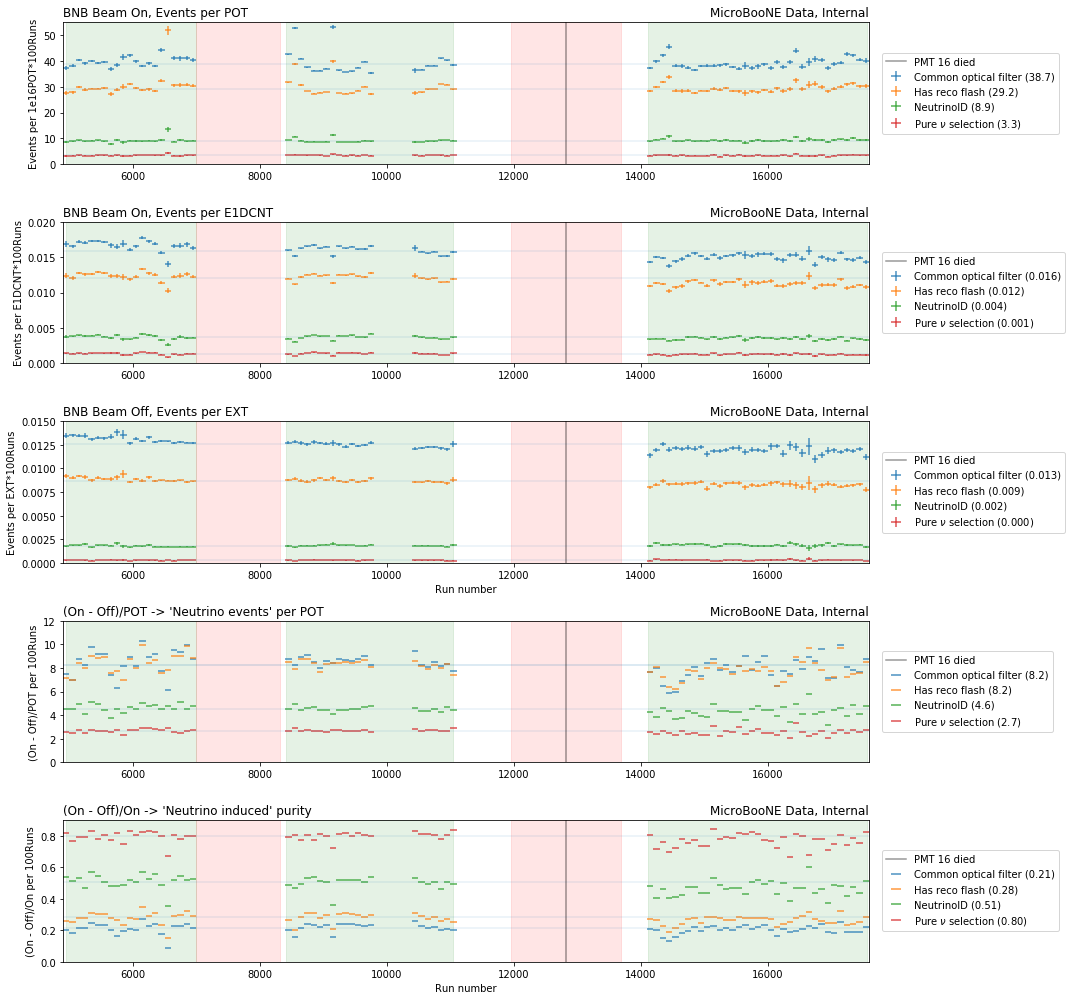

<IPython.core.display.Javascript object>

In [16]:
queries = ["nSlices", "hasBeamFlash", "foundATargetSlice", "pure_selection"]
q_labs = [
    "Common optical filter",
    "Has reco flash",
    "NeutrinoID",
    r"Pure $\nu$ selection",
]
N = 127

fig, ax = plt.subplots(nrows=5, figsize=(15, 14))
runs_on = np.concatenate([run_dict[r]["on"]["events"]["run"] for r in runs])
runs_off = np.concatenate([run_dict[r]["off"]["events"]["run"] for r in runs])
for query, lab in zip(queries, q_labs):
    mask_on = np.concatenate([run_dict[r]["on"]["events"][query] > 0 for r in runs])
    mask_off = np.concatenate([run_dict[r]["off"]["events"][query] > 0 for r in runs])

    sel_on = runs_on[mask_on]
    sel_off = runs_off[mask_off]
    data = [sel_on, sel_off]
    edges, edges_mid, [bins_on, bins_off], _ = plot_class.histHelper(
        N, run_min, run_max, data
    )

    # throw out useless stuff
    bins_on = bins_on[mask_0]
    bins_off = bins_off[mask_0]
    widths = (edges[1:] - edges[:-1])[mask_0] / 2
    edges_mid = np.array(edges_mid)[mask_0]

    # events per pot
    bins_on_pot = bins_on * (1e16 / pot_binned)
    err = np.sqrt(bins_on) * (1e16 / pot_binned)
    bins_on_pot_all = sum(bins_on) * (1e16 / sum(pot_binned))
    ax[0].axhline(y=bins_on_pot_all, alpha=0.1)
    ax[0].errorbar(
        edges_mid,
        bins_on_pot,
        xerr=widths,
        yerr=err,
        label=r"{} ({:0.1f})".format(lab, bins_on_pot_all),
        fmt="none",
        alpha=0.8,
    )
    # events per en1dcnt
    bins_on_en1dcnt = bins_on * (1 / en1dcnt_binned)
    err = np.sqrt(bins_on) * (1 / en1dcnt_binned)
    bins_on_en1dcnt_all = sum(bins_on) * (1 / sum(en1dcnt_binned))
    ax[1].axhline(y=bins_on_en1dcnt_all, alpha=0.1)
    ax[1].errorbar(
        edges_mid,
        bins_on_en1dcnt,
        xerr=widths,
        yerr=err,
        label=r"{} ({:0.3f})".format(lab, bins_on_en1dcnt_all),
        fmt="none",
        alpha=0.8,
    )
    # events per ext
    bins_off_ext = bins_off * (1 / ext_binned)
    err = np.sqrt(bins_off) * (1 / ext_binned)
    bins_off_ext_all = sum(bins_off) * (1 / sum(ext_binned))
    ax[2].axhline(y=bins_off_ext_all, alpha=0.1)
    ax[2].errorbar(
        edges_mid,
        bins_off_ext,
        xerr=widths,
        yerr=err,
        label=r"{} ({:0.3f})".format(lab, bins_off_ext_all),
        fmt="none",
        alpha=0.8,
    )
    # events subtracted
    diff_per_pot = (bins_on - bins_off * en1dcnt_binned / ext_binned) / (
        pot_binned / 1e16
    )
    diff_per_pot_all = (
        sum(bins_on) - sum(bins_off) * sum(en1dcnt_binned) / sum(ext_binned)
    ) / sum(pot_binned / 1e16)
    ax[3].axhline(y=diff_per_pot_all, alpha=0.1)
    ax[3].errorbar(
        edges_mid,
        diff_per_pot,
        xerr=widths,
        fmt="none",
        label=r"{} ({:0.1f})".format(lab, diff_per_pot_all),
        alpha=0.8,
    )

    print(sum(bins_on), sum(bins_off))
    # 'neutrino purity'
    diff_per_on = (bins_on - (bins_off * en1dcnt_binned / ext_binned)) / bins_on
    diff_per_on_all = (
        sum(bins_on) - sum(bins_off) * sum(en1dcnt_binned) / sum(ext_binned)
    ) / sum(bins_on)
    ax[4].axhline(y=diff_per_on_all, alpha=0.1)
    ax[4].errorbar(
        edges_mid,
        diff_per_on,
        xerr=widths,
        fmt="none",
        label=r"{} ({:0.2f})".format(lab, diff_per_on_all),
        alpha=0.8,
    )

for ax_i in ax:
    for b, c in zip(blocks, c_blocks):
        ax_i.axvspan(b[0], b[1], alpha=0.1, color=c)
    ax_i.axvline(x=12831, label="PMT 16 died", c="k", alpha=0.4)
    ax_i.set_xlim(run_min, run_max)
    ax_i.set_title("MicroBooNE Data, Internal", loc="right")
    ax_i.legend(bbox_to_anchor=(1.01, 0.5), loc="center left")

ax[0].set_ylim(0, 55)
ax[0].set_ylabel("Events per 1e16POT*100Runs")
ax[0].set_title("BNB Beam On, Events per POT", loc="left")
ax[1].set_ylim(0, 0.02)
ax[1].set_ylabel("Events per E1DCNT*100Runs")
ax[1].set_title("BNB Beam On, Events per E1DCNT", loc="left")
ax[2].set_ylabel("Events per EXT*100Runs")
ax[2].set_title("BNB Beam Off, Events per EXT", loc="left")
ax[2].set_ylim(0, 0.015)

ax[3].set_ylabel("(On - Off)/POT per 100Runs")
ax[3].set_title("(On - Off)/POT -> 'Neutrino events' per POT", loc="left")
ax[3].set_ylim(0, 12)

ax[4].set_ylabel("(On - Off)/On per 100Runs")
ax[4].set_title("(On - Off)/On -> 'Neutrino induced' purity", loc="left")
ax[4].set_ylim(0, 0.9)

ax[2].set_xlabel("Run number")
ax[4].set_xlabel("Run number")
fig.tight_layout()
fig.savefig(outdir + "events_per_exposure.pdf", bbox_inches="tight")

In [11]:
bins_off * en1dcnt_binned / ext_binned

array([ 26.09680582,  76.47101509, 172.39420665,  64.11260355,
       153.68377975, 183.52935399, 194.15399623,  42.38957168,
        35.40033434,  24.45010775,  99.86062886,  78.05813082,
       107.36180101,  66.34438031,  91.60006108,  64.84408866,
        23.0485482 ,  52.30206778,  30.85357097,  50.88339148,
        64.44119267, 521.86410712, 275.47302492, 455.57894724,
       773.85715219, 567.93967757, 663.47742493, 746.8966168 ,
       122.02528196, 686.93917921, 601.18308261, 594.82014336,
       538.12798116, 468.56499953, 170.94951062,  25.26287886,
       454.82940763, 636.70057887, 766.86335968, 726.47911682,
       559.72684699, 160.47942544, 139.7008189 , 192.58326167,
       106.38154599,  63.69243815,  80.91298514,  57.54007235,
       105.97823218, 125.35976172, 233.56291121,  87.06935682,
        66.49379855,  44.90280415, 122.29085426, 155.27698232,
        72.11814611,  10.68011592,  28.54886662,  37.64696565,
        94.94244548,  56.95551512,  84.47593111,  35.82

<IPython.core.display.Javascript object>

In [12]:
bins_on

array([ 143,  333,  837,  307,  907,  833,  988,  187,  192,   98,  591,
        401,  612,  389,  523,  320,   71,  273,  142,  253,  321, 2503,
       1418, 2043, 3988, 2479, 3524, 3762,  443, 3600, 3290, 2981, 2989,
       2427,  844,  148, 2400, 3438, 3980, 3299, 2868, 1004,  711,  680,
        448,  211,  294,  262,  428,  554,  888,  328,  426,  204,  591,
        734,  404,   57,  165,  200,  424,  248,  302,  174,  174,  198,
        152,   54,  110,  257,  198,  195,  340,  247,  270,  427,  198])

<IPython.core.display.Javascript object>

### Plots

In [13]:
# Add scales to compare different runs
target_pot = 1e20
for r in runs:
    on_scale = target_pot / run_dict[r]["on"]["pot"]
    run_dict[r]["on"]["events"]["scale"] = [on_scale] * run_dict[r]["on"]["num_events"]
    off_scale = run_dict[r]["on"]["en1dcnt"] / run_dict[r]["off"]["ext"]
    run_dict[r]["off"]["events"]["scale"] = [on_scale * off_scale] * run_dict[r]["off"][
        "num_events"
    ]

<IPython.core.display.Javascript object>

In [14]:
# 'Neutrino' purity (on-off)/on
selectors = [
    "nSlices",
    "nFlashes",
    "hasBeamFlash",
    "nSlicesAfterPrecuts",
    "foundATargetSlice",
    "pure_selection",
]
for sel in selectors:
    print("\n###", sel, "###")
    for r in runs:
        mask_on = run_dict[r]["on"]["events"][sel] > 0
        mask_off = run_dict[r]["off"]["events"][sel] > 0
        ratio = (
            sum(np.array(run_dict[r]["on"]["events"]["scale"])[mask_on])
            - sum(np.array(run_dict[r]["off"]["events"]["scale"])[mask_off])
        ) / sum(np.array(run_dict[r]["on"]["events"]["scale"])[mask_on])
        print(r, ratio)


### nSlices ###
1 0.2326034343329734
2 0.22382353743828926
3 0.20160918148526039

### nFlashes ###
1 0.24572397585192124
2 0.2346022452703972
3 0.2103549921415503

### hasBeamFlash ###
1 0.2986660760808147
2 0.2858138569684504
3 0.2636573293085809

### nSlicesAfterPrecuts ###
1 0.4893672777773764
2 0.4636790952078779
3 0.4360342625722382

### foundATargetSlice ###
1 0.5365495683607545
2 0.5071421409079252
3 0.4650322700875204

### pure_selection ###
1 0.8074966074706026
2 0.803987353318199
3 0.7739041955292686


<IPython.core.display.Javascript object>

#### Flash Plots

#### Optical Pre-cuts Plots

#### Other Plots

### Sandbox